Q1

Prepare rules for the movie dataset
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

Steps:
Import new data set and checking for null values
tranform to transactional form.

perform apriopri algorithm with different confidence and support values
NetworkX Visualizations

In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

In [2]:
data = pd.read_csv('my_movies.csv')
df = data.iloc[:,5:].copy()
df #transaction form.

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


Rule 1
min_support = 0.3
confidence = 100%
Apriori Algorithm - All subsets of a frequent Item set should also be frequent

In [3]:
frequent_itemsets1 = apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Patriot, Gladiator)",2
6,0.4,"(Patriot, Sixth Sense, Gladiator)",3


In [4]:
#Rule 1
rule1 = association_rules(frequent_itemsets1, min_threshold=1) #confidence = 100%
rule1.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


Text(0, 0.5, 'confidence')

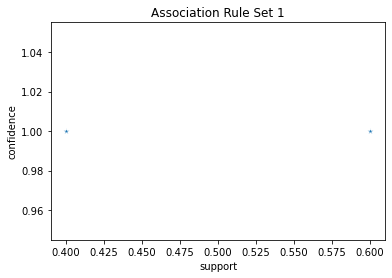

In [6]:
#visualizing
support = rule1.support
confidence=rule1.confidence
 
sns.scatterplot(data=rule1, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rule Set 1")
plt.xlabel('support')
plt.ylabel('confidence') 

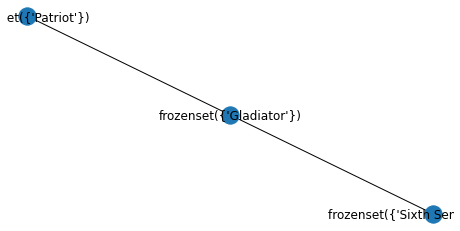

In [8]:
# visualizing using networkX
fig, ax=plt.subplots(figsize=(8,4))
GA=nx.from_pandas_edgelist(rule1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

Rule 2
min_support = 0.5
confidence = 60%

In [9]:
frequent_itemsets2 = apriori(df,min_support=0.5,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2 # 2-item itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.6,"(Patriot, Gladiator)",2


In [10]:
#Rule 2
#confidence = 60%
rule2 = association_rules(frequent_itemsets2, min_threshold=0.60) 
rule2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


Text(0, 0.5, 'confidence')

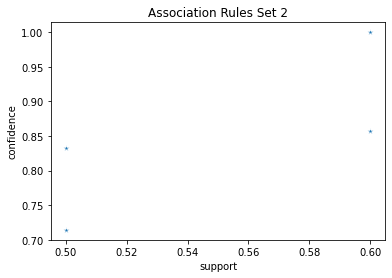

In [21]:
#visualizing
support = rule2.support
confidence=rule2.confidence
 
sns.scatterplot(data=rule2, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence')

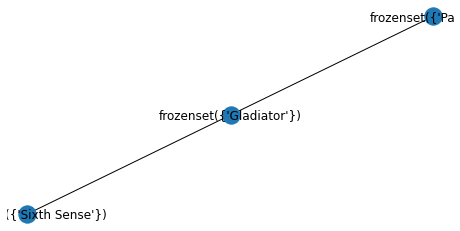

In [22]:
#visualization using networkX
fig, ax=plt.subplots(figsize=(8,4))
GA=nx.from_pandas_edgelist(rule2,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

Rule 3
min_support = 0.2
confidence = 40%

In [24]:
frequent_itemsets3 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3 

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [25]:
 #Rule 3
rule3 = association_rules(frequent_itemsets3, min_threshold=0.40) #confidence = 40%
rule3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


Text(0, 0.5, 'confidence')

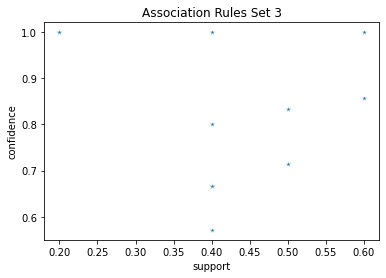

In [26]:
#visualizing
support = rule3.support
confidence=rule3.confidence
 
sns.scatterplot(data=rule3, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 

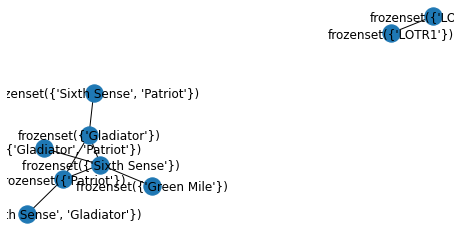

In [30]:
# Visualization using NetworkX
fig, ax=plt.subplots(figsize=(8,4))
GA=nx.from_pandas_edgelist(rule3,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

Conclusion

transaction form was created for initial dataset.
Three sets of Rules were generated for different values of support and confidence.
Visualizations were plotted for each set.

Q2

In [31]:
data = pd.read_csv('book.csv')
df = data.copy()
df # transaction form.

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

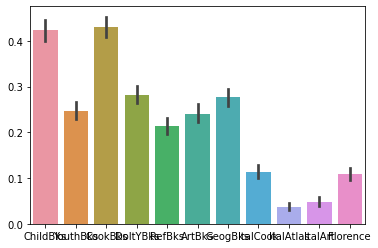

In [34]:
sns.barplot(data=df)

Text(0.5, 1.0, 'Values counts of books')

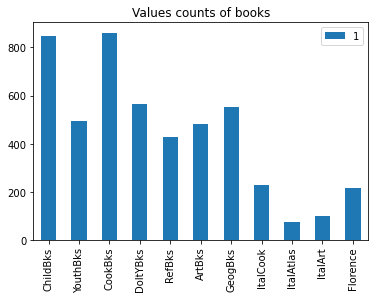

In [37]:
count_num = df.apply(pd.Series.value_counts).loc[1]
z = pd.DataFrame(count_num)
z.plot(kind='bar')
plt.title('Values counts of books')

Rule 1
min_support = 0.3
confidence = 100%

Apriori Algorithm - All subsets of a frequent Item set should also be frequent

In [38]:
frequent_itemsets1 = apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1 # 1-item itemsets

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [39]:
rule1 = association_rules(frequent_itemsets1, min_threshold=1)
rule1 #There are no rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Rule 2
min_support = 0.2
confidence = 60%

In [40]:
frequent_itemsets2 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2 # 2-item itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [41]:
rule2 = association_rules(frequent_itemsets2, min_threshold=0.60)
rule2 #Rule 2 only one rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


Text(0, 0.5, 'confidence')

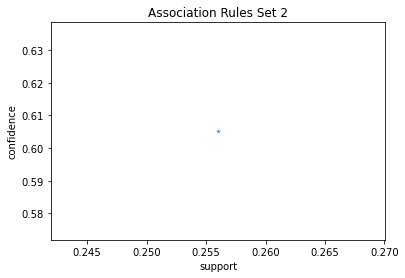

In [42]:
#visualizing
support = rule2.support
confidence=rule2.confidence
 
sns.scatterplot(data=rule2, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence')

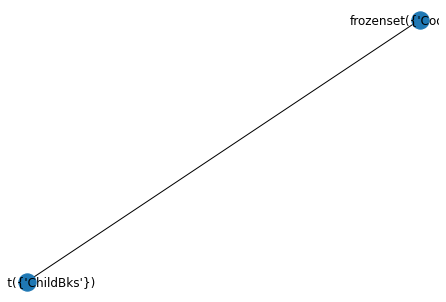

In [43]:
#Visualization using networkX
GA=nx.from_pandas_edgelist(rule2,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

Rule 3
min_support = 0.2
confidence = 40%

In [44]:
frequent_itemsets3 = apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [45]:
 #Rule 3
rule3 = association_rules(frequent_itemsets3, min_threshold=0.40)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


Text(0, 0.5, 'confidence')

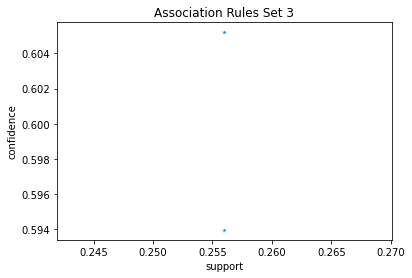

In [46]:
support = rule3.support
confidence=rule3.confidence
 
sns.scatterplot(data=rule3, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 

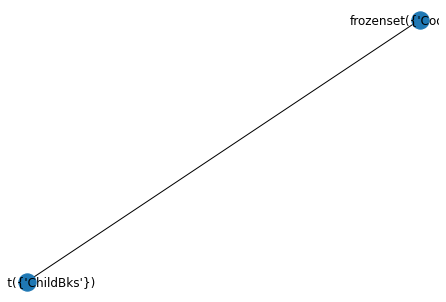

In [48]:
# Visualization using NetworkX
GA=nx.from_pandas_edgelist(rule3,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

Rule 4
min_support = 0.1
confidence = 60%

In [49]:
frequent_itemsets4 = apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets4['length'] = frequent_itemsets4['itemsets'].apply(lambda x: len(x))
frequent_itemsets4 # 3-item itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [54]:
rule4 = association_rules(frequent_itemsets4, min_threshold=0.60)
rule4 #Rule4 has 4 rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


Text(0, 0.5, 'confidence')

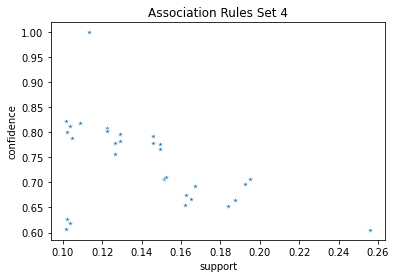

In [55]:
#visualizing
support = rule4.support
confidence=rule4.confidence
 
sns.scatterplot(data=rule4, x = support, y = confidence,  marker="*",palette='Dark')
plt.title("Association Rules Set 4")
plt.xlabel('support')
plt.ylabel('confidence')

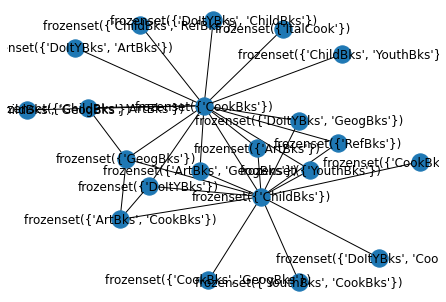

In [56]:
#Visualization using NetworkX
GA=nx.from_pandas_edgelist(rule4,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

Conclusion

Four sets of Rules were generated for different values of support and confidence.
Visualizations were plotted for each set.
rule set is 2 hace decent support and confidence.